In [ ]:
pip install tensorflow matplotlib numpy


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
num_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_features)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
max_sequence_length = 200
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length)

In [ ]:
model = Sequential()
model.add(Embedding(num_features, 32, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 135s 424ms/step - loss: 0.4661 - accuracy: 0.7697 - val_loss: 0.3600 - val_accuracy: 0.8500
Epoch 2/5
313/313 [==============================] - 95s 303ms/step - loss: 0.2564 - accuracy: 0.8992 - val_loss: 0.3215 - val_accuracy: 0.8734
Epoch 3/5
313/313 [==============================] - 95s 303ms/step - loss: 0.1952 - accuracy: 0.9291 - val_loss: 0.3256 - val_accuracy: 0.8722
Epoch 4/5
313/313 [==============================] - 93s 296ms/step - loss: 0.1377 - accuracy: 0.9520 - val_loss: 0.3703 - val_accuracy: 0.8656
Epoch 5/5
313/313 [==============================] - 97s 312ms/step - loss: 0.1016 - accuracy: 0.9664 - val_loss: 0.4050 - val_accuracy: 0.8426


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_features)

In [ ]:
predictions = model.predict(x_test)
binary_predictions = np.round(predictions).flatten().astype(int)
accuracy = accuracy_score(y_test, binary_predictions)

782/782 [==============================] - 36s 46ms/step


In [ ]:
print("Classification Report:")
print(classification_report(y_test, binary_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     12500
           1       0.82      0.86      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [ ]:
conf_matrix = confusion_matrix(y_test, binary_predictions)
print("Confusion Matrix : ",conf_matrix)

Confusion Matrix :  [[10150  2350]
 [ 1706 10794]]


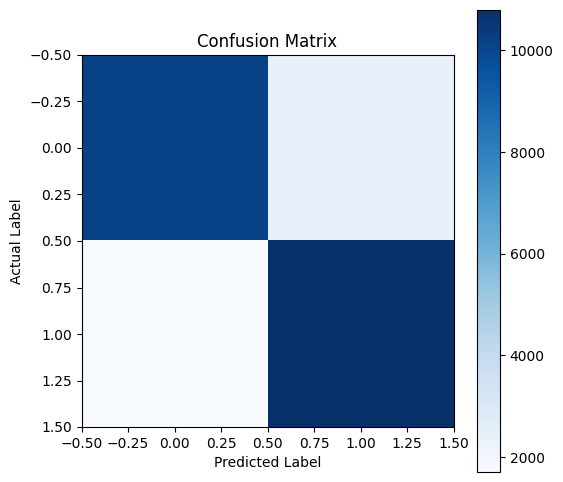

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

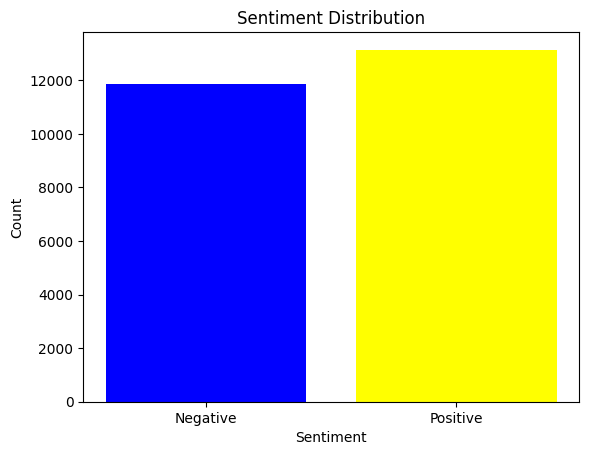

In [ ]:
sentiment_distribution = np.unique(binary_predictions, return_counts=True)
labels, counts = sentiment_distribution
plt.bar(labels, counts, color=['blue', 'yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(labels, ['Negative', 'Positive'])
plt.show()

In [ ]:
def predict_sentiment(user_input):
    user_input_sequence = tf.keras.preprocessing.sequence.pad_sequences(
        tokenizer.texts_to_sequences([user_input]), maxlen=max_sequence_length
    )
    prediction = model.predict(user_input_sequence)
    sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
    return sentiment

Enter a movie review for sentiment analysis: In the mesmerizing thriller 'Ephemeral Echoes,' director Lisa Chambers crafts a riveting narrative that seamlessly blends psychological tension with breathtaking visuals. The film follows protagonist Emma Harper, portrayed brilliantly by Olivia Monroe, as she unravels a web of secrets surrounding her mysterious past. The cinematography, characterized by its hauntingly beautiful compositions, adds an extra layer of intensity to the plot. The supporting cast, including seasoned actors like James Anderson and Sarah Rodriguez, delivers stellar performances that enhance the overall cinematic experience. With its unpredictable twists, emotionally charged scenes, and a haunting musical score, 'Ephemeral Echoes' keeps viewers on the edge of their seats from start to finish. Chambers has masterfully created a suspenseful and thought-provoking piece that transcends the boundaries of conventional storytelling.
1/1 [==============================] - 0s 

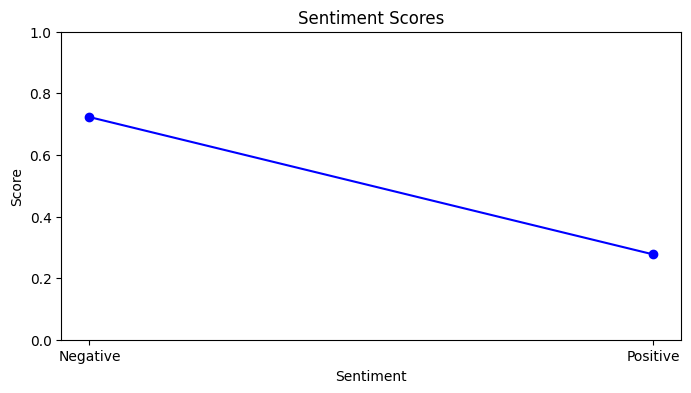

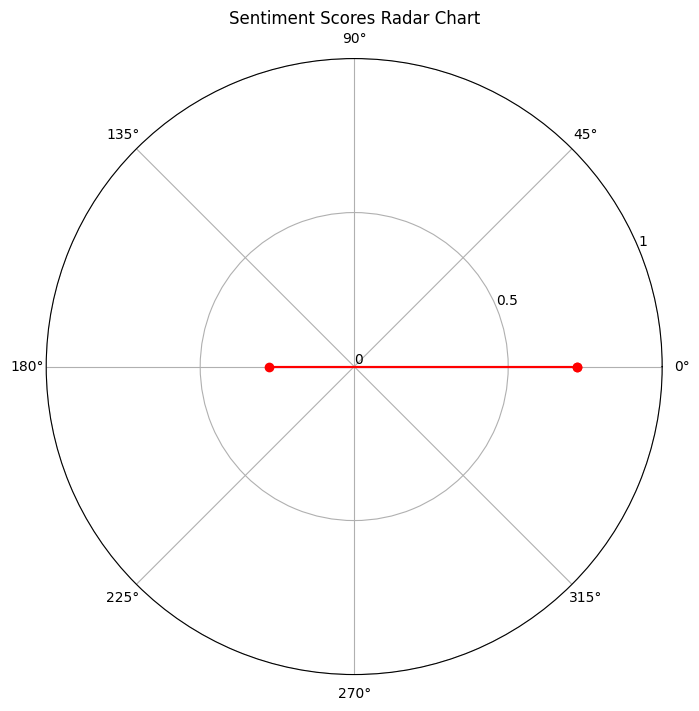

In [ ]:
user_input = input("Enter a movie review for sentiment analysis: ")
predicted_sentiment = predict_sentiment(user_input)
print(f"Predicted Sentiment: {predicted_sentiment}")

user_input_sequence = tf.keras.preprocessing.sequence.pad_sequences(
    tokenizer.texts_to_sequences([user_input]), maxlen=max_sequence_length
)
user_prediction = model.predict(user_input_sequence)[0][0]
labels = ['Negative', 'Positive']
scores = [1 - user_prediction, user_prediction]

plt.figure(figsize=(8, 4))
plt.plot(labels, scores, marker='o', linestyle='-', color='b')
plt.title('Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.show()

theta = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
theta = np.concatenate((theta, [theta[0]]))
scores = np.concatenate((scores, [scores[0]]))

plt.figure(figsize=(8, 8))
plt.polar(theta, scores, marker='o', linestyle='-', color='r')
plt.fill(theta, scores, alpha=0.25, color='b')
plt.title('Sentiment Scores Radar Chart')
plt.yticks([0, 0.5, 1], ['0', '0.5', '1'])
plt.show()

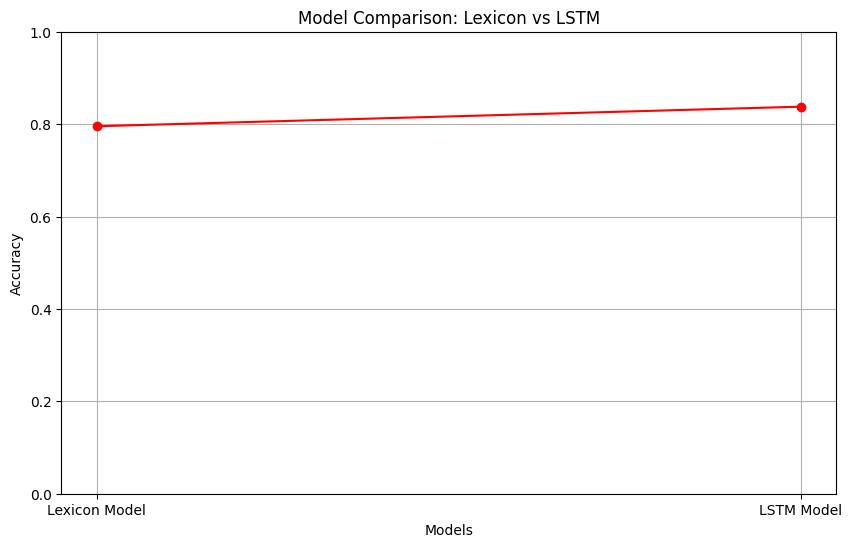

           Model  Accuracy
0  Lexicon Model   0.79540
1     LSTM Model   0.83776


In [ ]:
lexicon_model_accuracy = 0.7954  # Replace with actual accuracy

models = ['Lexicon Model', 'LSTM Model']
accuracy_scores = [lexicon_model_accuracy, accuracy]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracy_scores, marker='o', linestyle='-', color='red')
plt.ylim([0, 1])
plt.title('Model Comparison: Lexicon vs LSTM')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

import pandas as pd

data = {'Model': models, 'Accuracy': accuracy_scores}
comparison_table = pd.DataFrame(data)
print(comparison_table)